In [7]:
# Import tensorflow for machine learning
import tensorflow as tf
from tensorflow.keras import models

# Import tkinter for the  file dialog
from tkinter import *
from tkinter import filedialog

# Import numpy for data manipulation
import numpy as np

# Import cv2 for image manipulation
import cv2

# Import Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Import the current working directory function from os
from os import getcwd

In [8]:
# Load the AI model created in "CNN Trainer.ipynb"
model = models.load_model("Model")

# Find the width, height and channels of the model's input
config = model.get_config()
input_shape = config["layers"][0]["config"]["batch_input_shape"]

model_len = input_shape[1]
model_wid = input_shape[2]
model_chans = input_shape[3]

In [9]:
# Create Tkinter root, and hide it
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)

selected = False;
image_data = []

input_len = 0
input_wid = 0

# While the user has not selected a proper image...
while (not selected):
    
    # Prompt the user to select an image
    file_name = filedialog.askopenfilename(filetypes=[("Image Files", "*.png *.jpg *.jpeg")], initialdir = getcwd())
    %gui tk
    
    # If the user selected an image...
    if (file_name != ""):
        
        # Parse the image data
        image_data = cv2.imread(file_name)

        # Unpack the image dimensions
        input_len, input_wid, input_chans = image_data.shape
        
        # If the dimensions match, then we have successfully selected our image
        if (input_len == model_len and input_wid == model_wid and input_chans == model_chans):
            selected = True
        
        # Otherwise, remind the user of the correct file's dimensions
        else:
            print(f"Please select a file that is {model_len} x {model_wid} x {model_chans}");
        
    # Otherwise, warn the user that they must select an image
    else:
        print("Please select an image file.")
    
# Print the selected file name
print(f"You have selected: {file_name}")

You have selected: C:/Users/thoma/OneDrive - University of Adelaide/Pictures/Not my son.png


In [13]:
# Convert the image data to a numpy array and nest it so it is accepted by the AI
input_data = image_data;
input_data = np.expand_dims(input_data, axis=0)

In [14]:
# Generate a prediction for the selected image
prediction = model.predict(input_data)

# Flatten the prediction data so it is easier to work with
prediction = prediction.flatten()

1/1 [==============================] - 0s 37ms/step


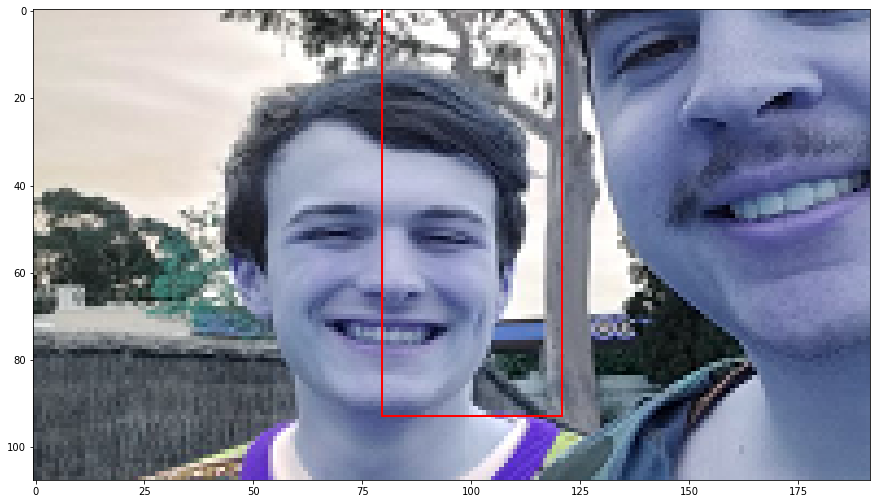

In [15]:
# Create subplot to display our prediction
fig, axis = plt.subplots(1,1,figsize=(15, 60)) 

# Display the image
axis.imshow(image_data)

# If the AI should detect the center of some object...
if (len(prediction) == 2):
    
    # Create a red point centered at where the AI thinks the object is
    pred_point = patches.Rectangle((prediction[0], prediction[1]), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
    axis.add_patch(pred_point)

# If the AI should detect a bounding box around some object...
elif (len(prediction) == 4):

    # Create a red bounding box around where the AI thinks the object is
    pred_len = prediction[2] - prediction[0]
    pred_wid = prediction[3] - prediction[1]

    pred_box = patches.Rectangle((prediction[0], prediction[1]), pred_len, pred_wid, linewidth=2, edgecolor='r', facecolor='none')
    axis.add_patch(pred_box)

# Otherwise, something has gone wrong
else:
    print("Input data not in 2D (center-point) or 4D (bounding box) format.")
        